# Second Order Filters

## Overview 

Generate filter response plots.

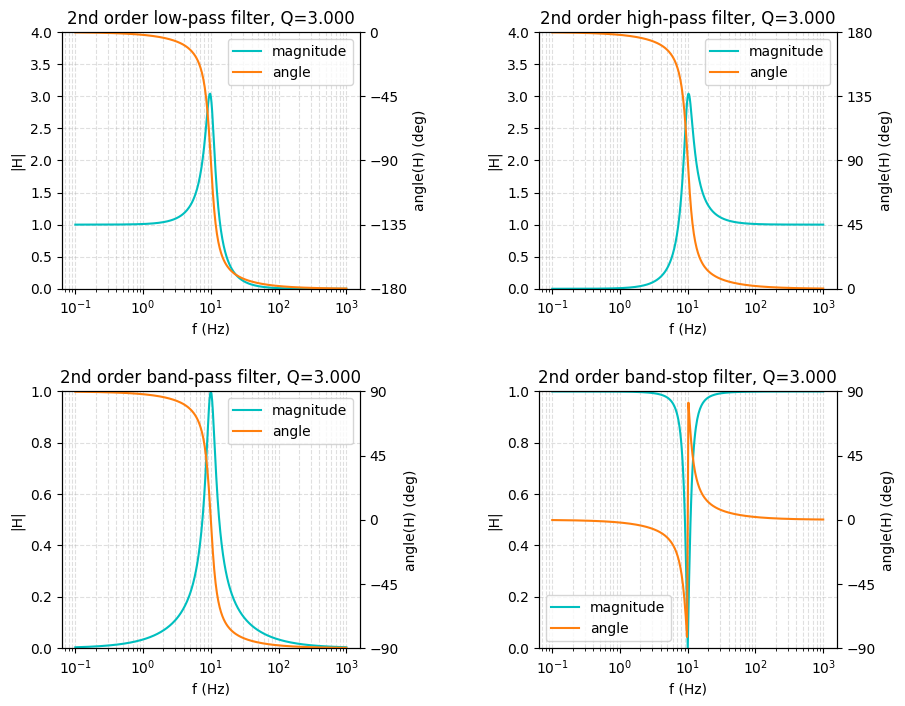

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def denom(w, wn, Q):
    zeta = wn/Q
    return wn*wn + 1j*w*zeta - w*w

def Hlp(w, wn, Q):
    return wn*wn / denom(w, wn, Q)

def Hhp(w, wn, Q):
    return -w*w / denom(w, wn, Q) 

def Hbp(w, wn, Q):
    zeta = wn/Q
    return  1j*w*zeta / denom(w, wn, Q) 

f = np.logspace(-1,3,401)
w = 2*np.pi*f

fn = 10
wn = 2*np.pi*fn

Q = 3 # 1/np.sqrt(2)

filters = [{'label':'low-pass', 'H':Hlp(w,wn,Q)},
           {'label':'high-pass', 'H':Hhp(w,wn,Q)},
           {'label':'band-pass', 'H':Hbp(w,wn,Q)},
           {'label':'band-stop', 'H':Hlp(w,wn,Q) + Hhp(w,wn,Q)}]

fig = plt.figure(figsize=(10, 8))

for ndx, filter in enumerate(filters):

    # subplot indices are 1-based, so add 1 to ndx
    ax = fig.add_subplot(2, 2, ndx+1)
    fig.subplots_adjust(hspace=0.4, wspace=0.6)

    Hf = filter['H']

    Hmax = np.ceil(np.max(np.abs(Hf)))

    angleHdeg = np.angle(Hf)*180/np.pi
    amin = np.round(np.min(angleHdeg/90.))*90.
    amax = np.round(np.max(angleHdeg/90.))*90.

    lns1 = ax.semilogx(f, np.abs(Hf), color='c', label='magnitude')
    ax.set_xlabel("f (Hz)")
    ax.set_ylabel("|H|")
    # ax.tick_params(axis='y')
    ax.set_ylim([0, Hmax])
    ax.grid(True, which='both', ls='--', alpha=0.4)

    ax2 = ax.twinx()
    lns2 = ax2.semilogx(f, angleHdeg, color='tab:orange', label='angle')
    ax2.set_ylabel("angle(H) (deg)")
    ax2.set_ylim([amin,amax])
    ax2.set_yticks(np.linspace(amin,amax,int(np.round((amax-amin)/45.))+1))
    # ax2.tick_params(axis='y')

    # combined legend
    lines = lns1 + lns2
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc='best')

    plt.title(f"2nd order {filter['label']} filter, Q={Q:1.3f}")

plt.show()


## Measurement and Calibration

1. Use the coarse adjust/cutoff and adjust the bias at the center tap of that potentiometer to 1V. Disconnect other inputs (CV and V/oct). 
2. Set the audio level to maximum (no attenuation).
3. Apply an 8Vpp sinusoid to the audio input.
4. Use the notch filter output to locate the cutoff frequency (where the AC-coupled output amplitude goes to zero and the phase inverts). 
5. Monitor the band pass output and adjust the resonance until you have unity gain (Q=1).
6. Sweep the frequency and record the amplitudes for each filter output.

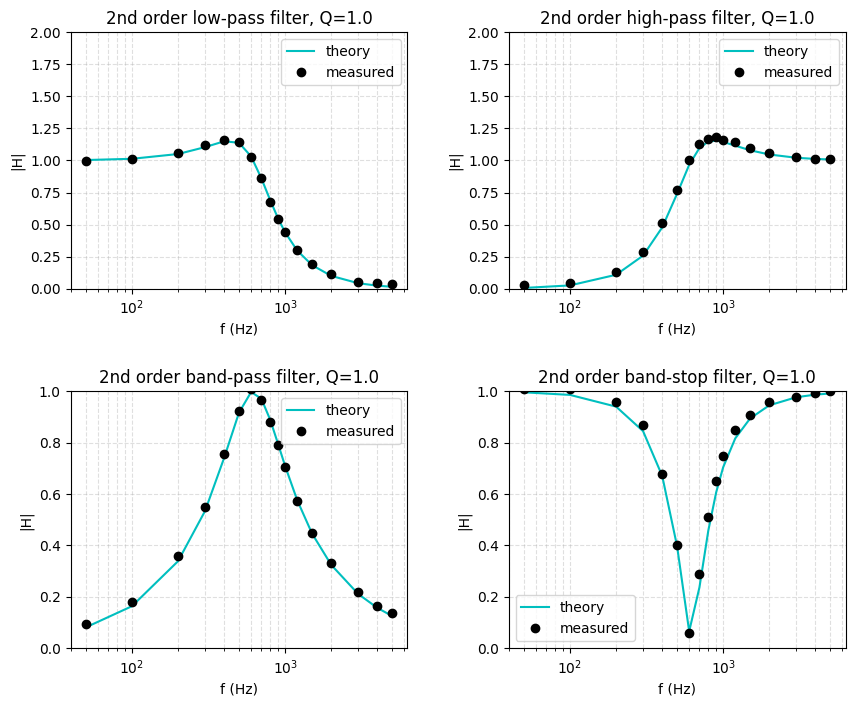

In [11]:
# Measured 2025-12-13
vpp_in = 8
fc = 620
freq = np.array([50, 100, 200, 300, 400, 500, 600, 700, 800, 900,1000,1200,1500,2000,3000,4000,5000])
mlp = np.array([7.96,8.08,8.48,8.96,9.28,9.12,8.24,6.88,5.40,4.32,3.52,2.44,1.56,0.93,0.44,0.36,0.27])
mhp = np.array([0.22,0.36,1.04,2.28,4.08,6.16,8.00,9.04,9.36,9.44,9.28,9.12,8.80,8.48,8.20,8.12,8.08])
mbp = np.array([0.76,1.44,2.88,4.40,6.04,7.40,8.08,7.72,7.04,6.32,5.64,4.60,3.60,2.64,1.76,1.32,1.08])
mbs = np.array([8.08,8.08,7.68,6.96,5.44,3.20,0.48,2.32,4.08,5.20,6.00,6.80,7.28,7.68,7.84,7.96,8.00])

w_meas = 2*np.pi*freq
wn_meas = 2*np.pi*fc

Q_meas = 1 

filters = [{'label':'low-pass', 'H':Hlp(w_meas, wn_meas, Q_meas), 'A':mlp/vpp_in},
           {'label':'high-pass', 'H':Hhp(w_meas, wn_meas, Q_meas), 'A':mhp/vpp_in},
           {'label':'band-pass', 'H':Hbp(w_meas, wn_meas, Q_meas), 'A':mbp/vpp_in},
           {'label':'band-stop', 'H':Hlp(w_meas, wn_meas, Q_meas) + Hhp(w_meas, wn_meas, Q_meas), 'A':mbs/vpp_in}]

fig = plt.figure(figsize=(10, 8))

for ndx, filter in enumerate(filters):

    # subplot indices are 1-based, so add 1 to ndx
    ax = fig.add_subplot(2, 2, ndx+1)
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    Hf = filter['H']
    Af = filter['A']

    Hmax = np.ceil(np.max(np.abs(Hf)))
    
    ln_theo = ax.semilogx(freq, np.abs(Hf), color='c', label='theory')
    ln_meas = ax.semilogx(freq, Af, color='k', marker='o', linestyle='None', label='measured')
    ax.set_xlabel("f (Hz)")
    ax.set_ylabel("|H|")
    # ax.tick_params(axis='y')
    ax.set_ylim([0, Hmax])
    ax.grid(True, which='both', ls='--', alpha=0.4)
    
    # combined legend
    lines = ln_theo + ln_meas
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc='best')

    plt.title(f"2nd order {filter['label']} filter, Q={Q_meas:1.1f}")

plt.show()
    